#Homework 2:
## Question  1 (a)
(a) Notice that we used 100 epochs which was waste of time and we could have stopped earlier since after about epoch 55 or so, the loss is not getting lower significantly. Modify the above code so that if the change in loss is less than  1% , you exit the iterations.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("iris_dataset.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df = df.iloc[:50][["sepal_length", "sepal_width"]]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
df.shape

(50, 2)

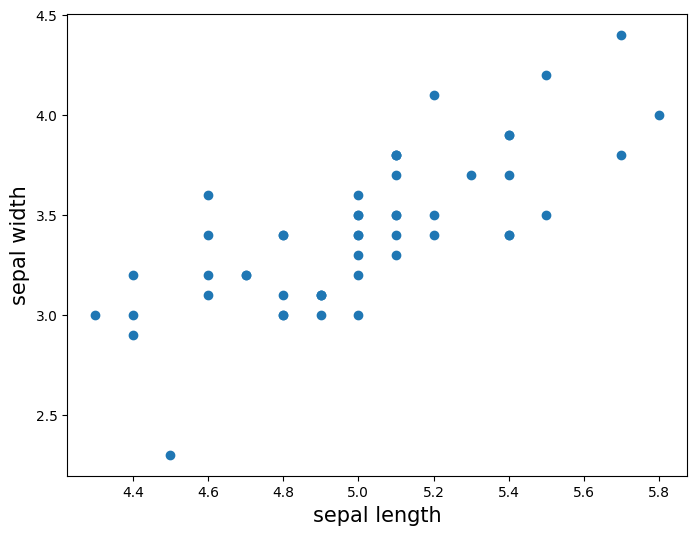

In [ ]:
# We create the scatter plot

plt.figure(figsize = (8, 6))

plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15);

In [ ]:
# We compute covariance between the two variables

df.cov()

,sepal_length,sepal_width
sepal_length,0.124249,0.100298
sepal_width,0.100298,0.145180


In [ ]:
# We cpompute the correlation between the two variables

df.corr()

,sepal_length,sepal_width
sepal_length,1.00000,0.74678
sepal_width,0.74678,1.00000


In [ ]:
#Creating custom Linear Regression model using batch gradient descent:
from sklearn.metrics import mean_squared_error

class MyLinReg(object):

    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 100):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

# Since we're specifying over the number of epochs, we replace '_' from the original code with 'epoch below' :
        for epoch in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi)**2)
            self.theta[:-1] -= 2*alpha*sum_1/n
            self.theta[-1] -= 2*alpha*sum_2/n
            self.errors.append(errors/n)

            #To find the percentage of change in losses, we find the absolute value of the difference between the current and previous epoch error and divide by the previous error
            if abs(self.errors[epoch] - self.errors[epoch-1]) / self.errors[epoch-1] < 0.01 and epoch > 0:
                print("Change in loss is less than 1% at epoch: ")
                print(epoch)
                break

        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [ ]:
X = df[['sepal_length']].to_numpy()
X

array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ]])

In [ ]:
X.shape

(50, 1)

In [ ]:
y = df["sepal_width"].to_numpy()
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [ ]:
def identity_function(z):
    return z

In [ ]:
model = MyLinReg(identity_function)
model.fit(X, y)

Change in loss is less than 1% at epoch: 
53


In [ ]:
model.predict(X)

array([3.55474118, 3.43178851, 3.30883584, 3.2473595 , 3.49326485,
       3.73917019, 3.2473595 , 3.49326485, 3.12440683, 3.43178851,
       3.73917019, 3.37031217, 3.37031217, 3.06293049, 3.98507553,
       3.9235992 , 3.73917019, 3.55474118, 3.9235992 , 3.55474118,
       3.73917019, 3.55474118, 3.2473595 , 3.55474118, 3.37031217,
       3.49326485, 3.49326485, 3.61621752, 3.61621752, 3.30883584,
       3.37031217, 3.73917019, 3.61621752, 3.80064653, 3.43178851,
       3.49326485, 3.80064653, 3.43178851, 3.12440683, 3.55474118,
       3.49326485, 3.18588317, 3.12440683, 3.49326485, 3.55474118,
       3.37031217, 3.55474118, 3.2473595 , 3.67769385, 3.49326485])

Change in loss is less than 1% at epoch: 
56


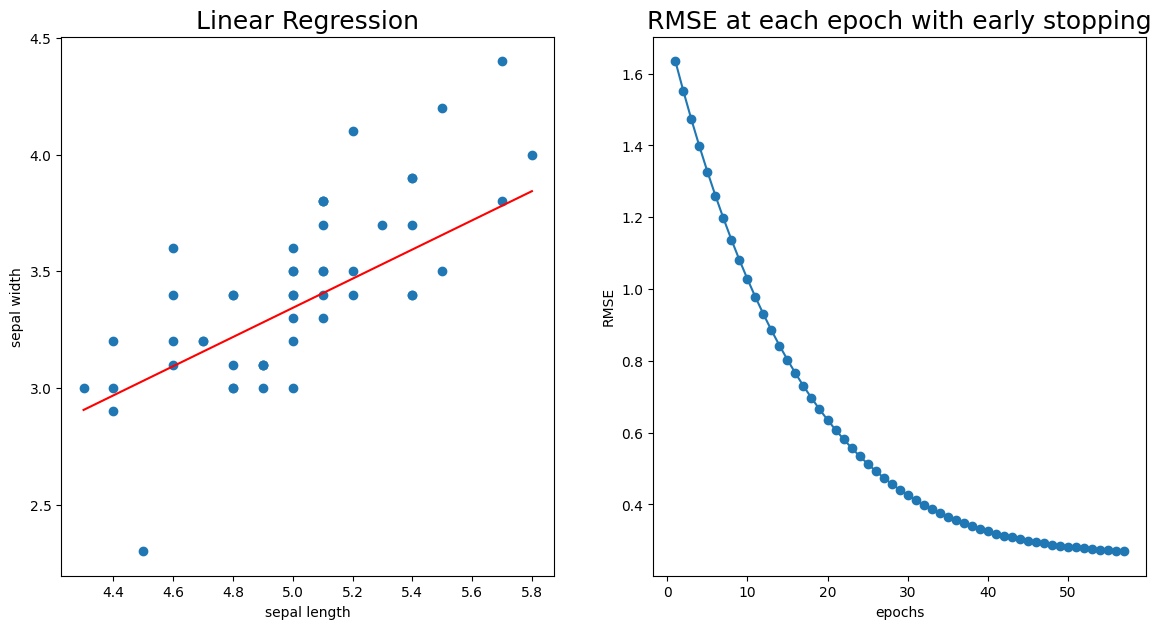

In [ ]:
model = MyLinReg(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1),
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch with early stopping", fontsize = 18);

###Obsevation:
###Change in loss is less than 1% at epoch:
###56 = No of iterations
###This value may change with each time the code is ran since we are randomizing the starting parameters, but the purpose is to show that we can shorten the run time.


# **Question 1 (b)**
## The above class uses batch gradient descent to find the minimum of the loss function. Modify the original code and use the stochastic gradient descent instead. Iterate over many iterations and see how the RMSE changes. The graph of RMSE for the batch gradient descent is smooth and decreasing as the number of iterations increases. What can you say about the graph of RMSE when the stochastic gradient descent is used?  



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df1 = pd.read_csv("iris_dataset.csv")
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df= df1.iloc[:50][["sepal_length","sepal_width"]]
df.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [ ]:
df.shape

(50, 2)

In [ ]:
#The covariance b/w the two variables

df.cov()

,sepal_length,sepal_width
sepal_length,0.124249,0.100298
sepal_width,0.100298,0.145180


In [ ]:
#The correlation coefficient b/w the two variables

df.corr()

,sepal_length,sepal_width
sepal_length,1.00000,0.74678
sepal_width,0.74678,1.00000


In [ ]:

y = df["sepal_width"].to_numpy()
y

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3])

In [ ]:
X = df[["sepal_length"]].to_numpy()
X


array([[5.1],
       [4.9],
       [4.7],
       [4.6],
       [5. ],
       [5.4],
       [4.6],
       [5. ],
       [4.4],
       [4.9],
       [5.4],
       [4.8],
       [4.8],
       [4.3],
       [5.8],
       [5.7],
       [5.4],
       [5.1],
       [5.7],
       [5.1],
       [5.4],
       [5.1],
       [4.6],
       [5.1],
       [4.8],
       [5. ],
       [5. ],
       [5.2],
       [5.2],
       [4.7],
       [4.8],
       [5.4],
       [5.2],
       [5.5],
       [4.9],
       [5. ],
       [5.5],
       [4.9],
       [4.4],
       [5.1],
       [5. ],
       [4.5],
       [4.4],
       [5. ],
       [5.1],
       [4.8],
       [5.1],
       [4.6],
       [5.3],
       [5. ]])

In [ ]:
class MySGDLinReg(object):
    def __init__(self, activation_function):
        self.activation_function = activation_function
    def fit(self, X, y, alpha = 0.001, iterations = 100):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]
        for _ in range(iterations):
          #Rather than going through the whole data set, we're updating each individual data point
            ri = np.random.randint(0, n)
            xi = X[ri]
            yi = y[ri]
            sum_1=(self.predict(xi)-yi)*xi
            sum_2=(self.predict(xi)-yi)
            errors=((self.predict(xi)-yi)**2)
            self.theta[:-1]-=2*alpha*sum_1
            self.theta[:-1]-=2*alpha*sum_2
            self.errors.append(errors) #MSE
        return self
    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)

In [ ]:
def identity_function(z):
    return z

In [ ]:
model = MySGDLinReg(identity_function)


In [ ]:
model.fit(X, y)

In [ ]:
model.predict(X)

array([3.44268671, 3.3391358 , 3.23558489, 3.18380944, 3.39091125,
       3.59801307, 3.18380944, 3.39091125, 3.08025854, 3.3391358 ,
       3.59801307, 3.28736035, 3.28736035, 3.02848308, 3.80511488,
       3.75333942, 3.59801307, 3.44268671, 3.75333942, 3.44268671,
       3.59801307, 3.44268671, 3.18380944, 3.44268671, 3.28736035,
       3.39091125, 3.39091125, 3.49446216, 3.49446216, 3.23558489,
       3.28736035, 3.59801307, 3.49446216, 3.64978852, 3.3391358 ,
       3.39091125, 3.64978852, 3.3391358 , 3.08025854, 3.44268671,
       3.39091125, 3.13203399, 3.08025854, 3.39091125, 3.44268671,
       3.28736035, 3.44268671, 3.18380944, 3.54623761, 3.39091125])

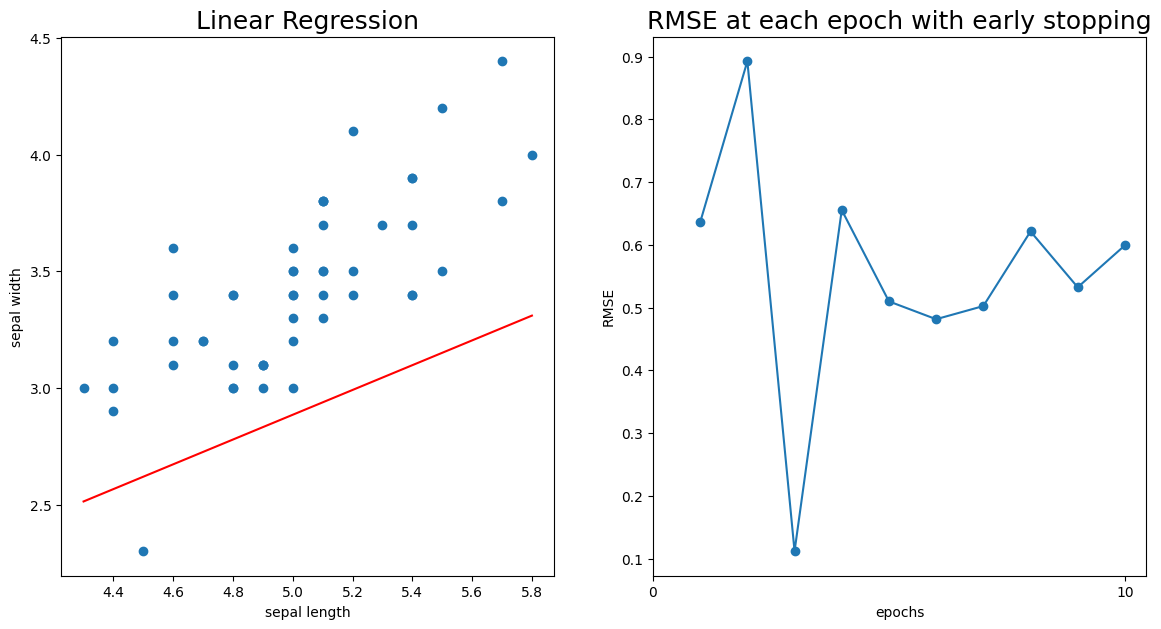

In [ ]:
model = MySGDLinReg(identity_function)
model.fit(X, y, alpha = 0.001, iterations = 10)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1),
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch with early stopping", fontsize = 18);

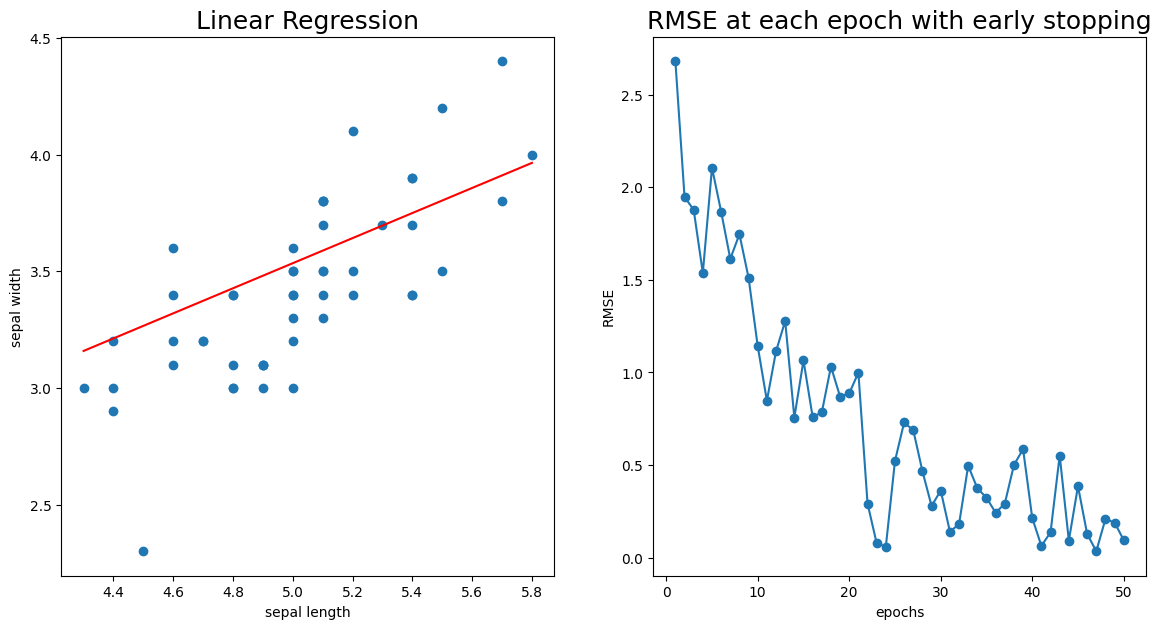

In [ ]:
model = MySGDLinReg(identity_function)
model.fit(X, y, alpha = 0.001, iterations = 50)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1),
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch with early stopping", fontsize = 18);

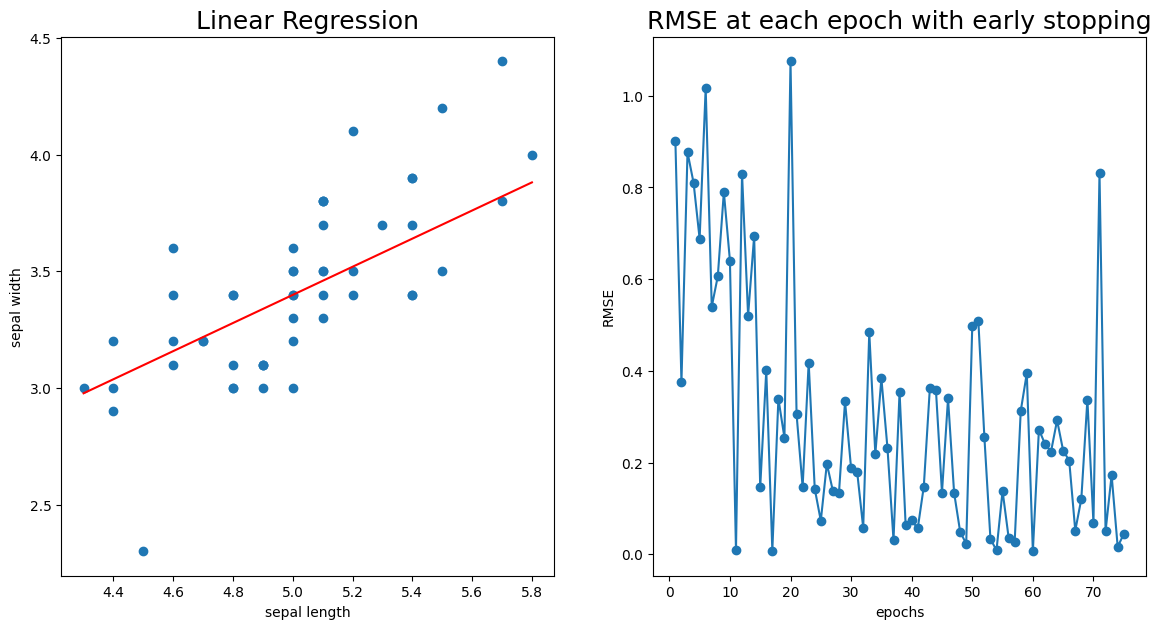

In [ ]:
model = MySGDLinReg(identity_function)
model.fit(X, y, alpha = 0.001, iterations = 75)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1),
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch with early stopping", fontsize = 18);

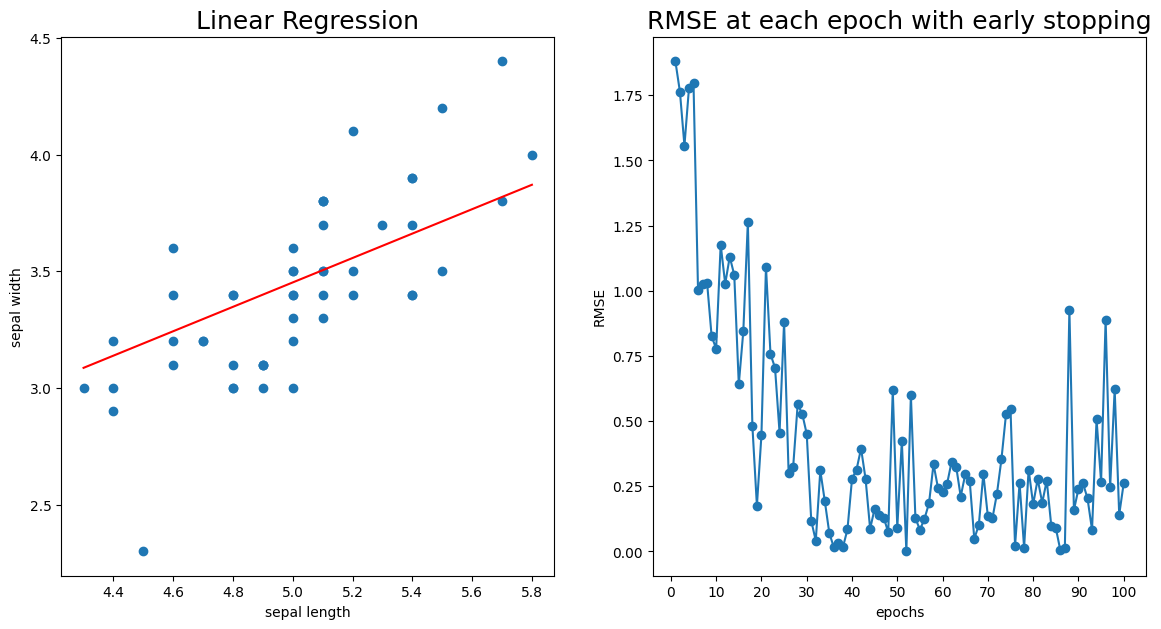

In [ ]:
model = MySGDLinReg(identity_function)
model.fit(X, y, alpha = 0.001, iterations = 100)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1),
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch with early stopping", fontsize = 18);

# Observation:
### 1 (a)


*   Above code is used to do this exercise where the converegence criteria is taken as the change in loss is less than 1%. Once the convergence is reached the final iteration is achieved. **In this case the final iteration is 56**. It's evident in the RMSE vs Epoch graph where the slope is becoming zero.

### 1 (b)

*   Successfully adopted the stochastic gradient descent method for getting the minimum of loss function.

Sensitivity study has been performed by varying the number of iterations.
As the number of iterations increase the regression using stochastic gradient descent method is becoming more accurate. we can say that the cost function might not necissarily go down as we taken some random training data every iteration





# Question 2
### Try using sklearn SGDRegressor class instead of sklearn LinearRegression.

### If the input variables are of different scales (here, TV and radio), scaling those variables improves SGD convergence. Read about sklearn MinMaxScaler and try to see if using it will give better results.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

ads_data = pd.read_csv("advertising_dataset.csv")


---

The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple media channels like TV, radio, and newspapers. We want to understand the impact of ad budgets on the overall sales.

---

In [ ]:
ads_data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
ads_data = ads_data[["TV", "radio","newspaper","sales"]]
ads_data.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
ads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
ads_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


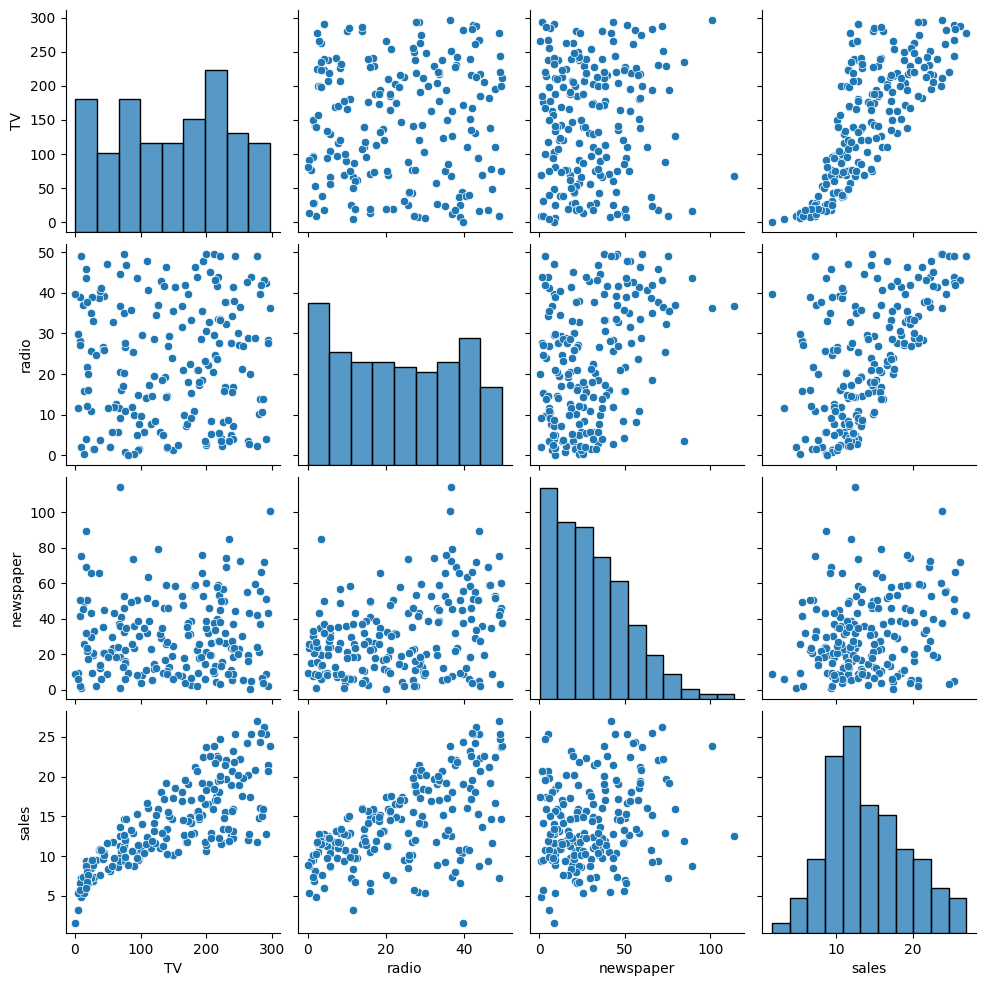

In [ ]:
sns.pairplot(ads_data)

In [ ]:
ads_data.cov()

,TV,radio,newspaper,sales
TV,7370.949893,69.862492,105.919452,350.390195
radio,69.862492,220.427743,114.496979,44.635688
newspaper,105.919452,114.496979,474.308326,25.941392
sales,350.390195,44.635688,25.941392,27.221853


In [ ]:
corr_matrix = np.round(ads_data.corr(), 2)
corr_matrix

,TV,radio,newspaper,sales
TV,1.00,0.05,0.06,0.78
radio,0.05,1.00,0.35,0.58
newspaper,0.06,0.35,1.00,0.23
sales,0.78,0.58,0.23,1.00


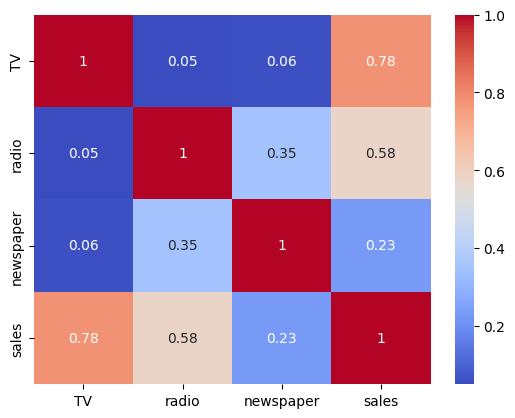

In [ ]:
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm");



Based on the scatter plots as well as on the correlation coefficients, we choose to create a linear regression model to
predict "sales" based on "TV" and "radio".


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

ads_data = pd.read_csv("advertising_dataset.csv")

In [ ]:
ads_data = ads_data[["TV", "radio","newspaper","sales"]]
ads_data.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
X = ads_data[['TV', 'radio']]
y = ads_data['sales']

In [ ]:
X = ads_data[['TV', 'radio']]
y = ads_data['sales']

print(X.head())
print(y.head())

      TV  radio
0  230.1   37.8
1   44.5   39.3
2   17.2   45.9
3  151.5   41.3
4  180.8   10.8
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


## Using MinMaxScaler and sgd regressor

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = ads_data[['TV', 'radio']]
y = ads_data['sales']

print(X.head())
print(y.head())

      TV  radio
0  230.1   37.8
1   44.5   39.3
2   17.2   45.9
3  151.5   41.3
4  180.8   10.8
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
# applying Min max scalar
scaler = MinMaxScaler()
# transform data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
SGD_reg = SGDRegressor()



In [ ]:
SGD_reg.fit(X_train, y_train.ravel())


SGDRegressor()

In [ ]:
y_train_pred = SGD_reg.predict(X_train)

y_test_pred = SGD_reg.predict(X_test)

In [ ]:
w1 = SGD_reg.coef_
b1 = SGD_reg.intercept_

In [ ]:
mse_train = mean_squared_error(y_train, SGD_reg.predict(X_train))
mse_test = mean_squared_error(y_test, SGD_reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 1.6864446141649336

RMSE on the test data: 1.8722092592789312


#Observation
 implemented sklearn SGDRegressor class using MinMAx scaler instead of sklearn LinearRegression.
We observed that when using the two classes, SGD Regressor showed a reduced RSME value than when using the Linear Regression class
1. **By using Linear regression RMSE values are:**
* RMSE on the training data: 1.5802375959959865
* RMSE on the test data: 1.915475673176425
2. **By using SGD regression RMSE values are:**
* RMSE on the training data: 1.6839142196474137
* RMSE on the test data: 1.866986789082796

It is clearly observed that RMSE error difference is less by using SGd regressor and SGD performed better than Linear regressor. This is inferred due to the testing data RMSE of the SGD regressor being more accurate than the linear



#Question 3:

## Import the data file ```mtcars.csv```. The goal isto determine two or three continuous numerical variables that can be used to predict mpg(miles per gallon) using multiple linear regression. You can use ```sklearn``` or custom class; batch GD, SGD, or mini-batch SGD;and scaling.  



## Two continuous numerical variables

### Multiple Linear Regression

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

In [ ]:
df=pd.read_csv('mtcars.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
X=df[['wt','qsec']]
y=df['mpg']
print(X.head())
print(y.head())

      wt   qsec
0  2.620  16.46
1  2.875  17.02
2  2.320  18.61
3  3.215  19.44
4  3.440  17.02
0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64


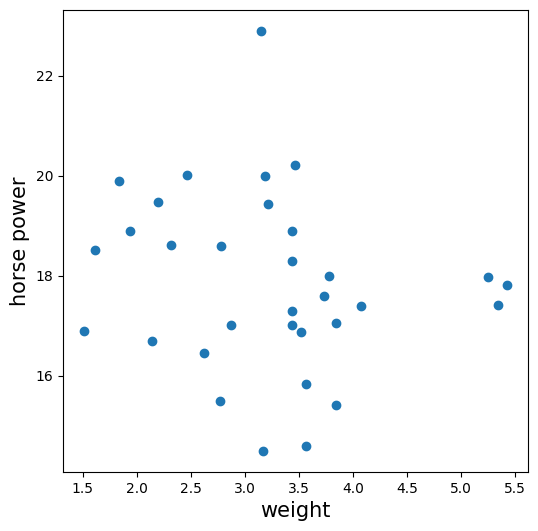

In [ ]:
plt.figure(figsize = (6,6))

plt.scatter(df['wt'], df['qsec'])
plt.xlabel("weight", fontsize = 15)
plt.ylabel("horse power", fontsize = 15);

In [ ]:
X.cov()

,wt,qsec
wt,0.957379,-0.305482
qsec,-0.305482,3.193166


In [ ]:
X.corr()

,wt,qsec
wt,1.000000,-0.174716
qsec,-0.174716,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
w = reg.coef_
b = reg.intercept_

w,b

(array([-5.06246271,  0.96959983]), 18.804682672558382)

In [ ]:
print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * wt + {np.round(w[1],3)} * qsec + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = -5.062 * wt + 0.97 * qsec + 18.805


In [ ]:
mse_train = mean_squared_error(y_train, reg.predict(X_train))
mse_test = mean_squared_error(y_test, reg.predict(X_test))

print(f"MSE on the training data: {np.sqrt(mse_train)}\n")
print(f"MSE on the test data: {np.sqrt(mse_test)}")

MSE on the training data: 2.5576785781982965

MSE on the test data: 2.323919585605691


# Standard scaler SGD regressor

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:

X=df[['wt','qsec']]
y=df['mpg']
print(X.head())
print(y.head())

      wt   qsec
0  2.620  16.46
1  2.875  17.02
2  2.320  18.61
3  3.215  19.44
4  3.440  17.02
0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64


In [ ]:
X.cov()

,wt,qsec
wt,0.957379,-0.305482
qsec,-0.305482,3.193166


In [ ]:
X.corr()

,wt,qsec
wt,1.000000,-0.174716
qsec,-0.174716,1.000000


In [ ]:
scaler = StandardScaler()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
X_train1=scaler.fit_transform(X_train)

X_test1=scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
SGD_reg = SGDRegressor()


In [ ]:
SGD_reg.fit(X_train,np.ravel(y_train,order='C'))

SGDRegressor()

In [ ]:
w = SGD_reg.coef_
b = SGD_reg.intercept_

w, b

(array([-3.3000792 ,  1.77065577]), array([0.30795491]))

In [ ]:
print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * wt + {np.round(w[1],3)} * qsec + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = -3.3 * wt + 1.771 * qsec + [0.308]


In [ ]:
mse_train = mean_squared_error(y_train, SGD_reg.predict(X_train))
mse_test = mean_squared_error(y_test, SGD_reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 3.4897804396468697

RMSE on the test data: 3.268630649076066


### Min Max scaler SGD regressor

In [ ]:
scaler = MinMaxScaler()
#X=scaler.fit_transform(df[['wt','qsec']])
#y=scaler.fit_transform(df[['mpg']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
SGD_reg = SGDRegressor(max_iter=10000, alpha=0.01, random_state=42)


In [ ]:
SGD_reg.fit(X_train,y_train)

SGDRegressor(alpha=0.01, max_iter=10000, random_state=42)

In [ ]:
w = SGD_reg.coef_
b = SGD_reg.intercept_

w, b

(array([-13.88274725,   7.48930667]), array([21.53935925]))

In [ ]:
print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * wt + {np.round(w[1],3)} * qsec + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = -13.883 * wt + 7.489 * qsec + [21.539]


In [ ]:
mse_train = mean_squared_error(y_train, SGD_reg.predict(X_train))
mse_test = mean_squared_error(y_test, SGD_reg.predict(X_test))

print(f"RMSE on the training data: {np.sqrt(mse_train)}\n")
print(f"RMSE on the test data: {np.sqrt(mse_test)}")

RMSE on the training data: 2.91438785438564

RMSE on the test data: 2.768449297447115


## Three continous variables

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor

In [ ]:
data=pd.read_csv('mtcars.csv')

In [ ]:
X=data[['wt','hp','cyl']]
y=data['mpg']

In [ ]:
data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
w=reg.coef_

In [ ]:
b=reg.intercept_

In [ ]:
print(f"The linear regression model based on the training data is \n")
print(f"predicted_sales = {np.round(w[0],3)} * wt + {np.round(w[1],3)} * hp + {np.round(w[2],3)}  * cyl + {np.round(b,3)}")

The linear regression model based on the training data is 

predicted_sales = -3.081 * wt + -0.017 * hp + -0.972  * cyl + 38.281


In [ ]:
mse_train = mean_squared_error(y_train, reg.predict(X_train))
mse_test = mean_squared_error(y_test, reg.predict(X_test))

print(f"MSE on the training data: {np.sqrt(mse_train)}\n")
print(f"MSE on the test data: {np.sqrt(mse_test)}")

MSE on the training data: 2.2612974158570274

MSE on the test data: 2.716479005609973


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.82


# Observation
## Question 3:
* on the dataset Mycars.csv,by using **two continuous numerical variables weight, Quarter Mile Elapsed Time (wt,
qsec)** were used to predict mpg(miles per gallon) using multiple linear regression, SGD using StandardScaler and SGD using MinMaxScaler and all MSE values were noted.

**MSE values for Multiple Linear regression**
* MSE on the training data: 2.557
* MSE on the test data: 2.323

**MSE values for SGD using StandardScaler**
* RMSE on the training data: 3.489
* RMSE on the test data: 3.268

**MSE values for SGD using MinMaxScaler**
* RMSE on the training data: 2.914
* RMSE on the test data: 2.768

and also implemented linear regression by using three continuous variables  weight, Quarter Mile Elapsed Time, number of cylinder (wt,hp,cyl) and MSE and * R-Squared values ate noted.

 **MSE value for 3 continuous variables**
* MSE on the training data: 2.261
* MSE on the test data: 2.716


### Part 4:  

Read about Probabilistic Interpretation of Linear Regression -- reference [1] in lecture notes, pages 11-13.

## Task completed